<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_Metrics_Calinski_Harabasz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Метрика для оценки кластеризации без знания истинных меток. Некий аналог дисперсионного анализа - сравнение дисперсии между кластерами с дисперсией внутри кластера.

In [18]:
# импорт
from sklearn import datasets
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# данные
X_blob, y_blob       = datasets.  make_blobs(n_samples=100,
                                             n_features=2,
                                             centers=3,
                                             cluster_std=2,
                                             random_state=42)

X_moons, y_moons     = datasets.  make_moons(n_samples=100,
                                             noise=0.1,
                                             random_state=42)

X_circles, y_circles = datasets.make_circles(n_samples=100,
                                             noise=0.2,
                                             factor=0.3,
                                             random_state=42)

In [25]:
# стандартизация
scaler = StandardScaler()
X_blob_std    = scaler.fit_transform(X_blob)
X_moons_std   = scaler.fit_transform(X_moons)
X_circles_std = scaler.fit_transform(X_circles)

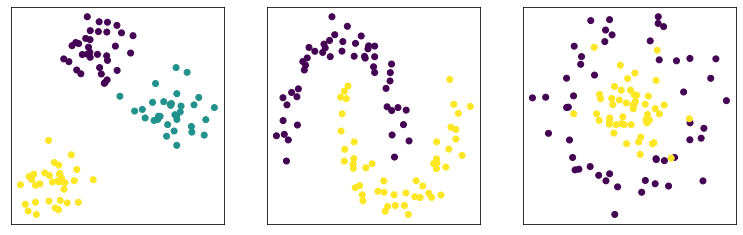

In [30]:
# печать
plt.figure(figsize=(13, 4))

plt.subplot(131)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob)
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles)
plt.xticks([])
plt.yticks([])
plt.show()

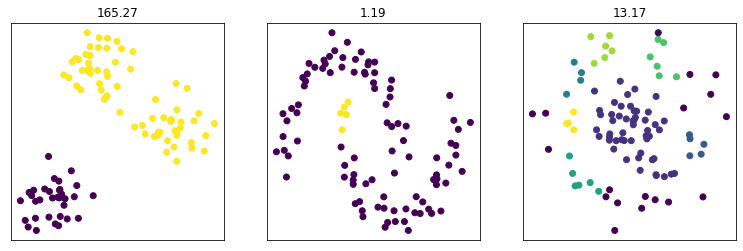

In [36]:
# проверим DBSCAN
# создание экземпляра
dbscan_ = DBSCAN()
# печать
plt.figure(figsize=(13, 4))
plt.subplot(131)
# обучение и предсказание меток
y_blob_dbscan = dbscan_.fit_predict(X_blob_std)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob_dbscan)
# вывод метрики
plt.title(f'{calinski_harabasz_score(X_blob_std, y_blob_dbscan):.2f}')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
# обучение и предсказание меток
y_moons_dbscan = dbscan_.fit_predict(X_moons_std)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons_dbscan)
# вывод метрики
plt.title(f'{calinski_harabasz_score(X_moons_std, y_moons_dbscan):.2f}')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
# обучение и предсказание меток
y_circles_dbscan = dbscan_.fit_predict(X_circles_std)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles_dbscan)
# вывод метрики
plt.title(f'{calinski_harabasz_score(X_circles_std, y_circles_dbscan):.2f}')
plt.xticks([])
plt.yticks([])
plt.show()

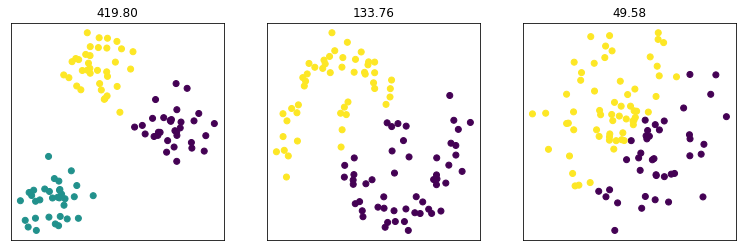

In [37]:
# испытаем k-Means
kmeans = KMeans(n_clusters=2, random_state=42)
# печать
plt.figure(figsize=(13, 4))
plt.subplot(131)
# обучение и предсказание меток
# для blobs обучим отдельный экземпляр
kmeans_3_42 = KMeans(n_clusters=3, random_state=42)
y_blob_kmeans = kmeans_3_42.fit_predict(X_blob_std)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob_kmeans)
# вывод метрики
plt.title(f'{calinski_harabasz_score(X_blob_std, y_blob_kmeans):.2f}')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
# обучение и предсказание меток
y_moons_kmeans = kmeans.fit_predict(X_moons_std)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons_kmeans)
# вывод метрики
plt.title(f'{calinski_harabasz_score(X_moons_std, y_moons_kmeans):.2f}')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
# обучение и предсказание меток
y_circles_kmeans = kmeans.fit_predict(X_circles_std)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles_kmeans)
# вывод метрики
plt.title(f'{calinski_harabasz_score(X_circles_std, y_circles_kmeans):.2f}')
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
# видно что лучшее разделение дало самую высокую оценку